In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [36]:
df = pd.read_csv("Studio.csv")
df = df.dropna()
df = df.set_index('Date')
df.head()

,Disney,AMCX,CMCSA,FOXA,SNE,TWX,VIAB
Date,,,,,,,
6/16/2011,103.44,35.49,8.49,12.10,30.02,28.21,38.49
6/17/2011,103.60,35.05,8.37,12.13,29.88,27.89,39.38
6/20/2011,103.69,34.95,8.31,12.33,29.85,27.82,40.47
6/21/2011,103.17,35.00,8.49,12.16,29.80,27.53,40.44
6/22/2011,104.74,35.54,8.46,12.26,30.41,27.57,41.29


In [37]:
# summarize the data
df.describe()

,Disney,AMCX,CMCSA,FOXA,SNE,TWX,VIAB
count,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000
mean,80.122859,58.516707,19.885525,23.840730,22.771797,53.032600,44.534517
std,25.940343,12.667415,7.735109,8.754532,7.077516,19.875721,18.695227
min,29.000000,30.280000,7.610000,10.270000,9.630000,25.700000,11.960000
25%,54.490000,51.225000,12.092500,14.875000,17.400000,33.787500,30.597500
50%,88.785000,60.230000,20.235000,25.890000,21.260000,54.455000,42.485000
75%,102.542500,66.690000,27.370000,32.625000,28.107500,70.237500,50.955000
max,121.690000,86.270000,32.250000,39.010000,40.440000,91.010000,88.900000


In [39]:
df.shape

(1658, 7)

In [40]:
# check the column names
df.columns

Index(['Disney', 'AMCX', 'CMCSA', 'FOXA', 'SNE', 'TWX', 'VIAB'], dtype='object')

In [58]:
# Create  new data frame CDF AND VIZ from existing dataframe
# New dataframe contains selected columns from old dataframe
cdf=df[['Disney', 'AMCX', 'CMCSA', 'FOXA', 'SNE', 'TWX', 'VIAB']]
cdf.head()

,Disney,AMCX,CMCSA,FOXA,SNE,TWX,VIAB
Date,,,,,,,
6/16/2011,103.44,35.49,8.49,12.10,30.02,28.21,38.49
6/17/2011,103.60,35.05,8.37,12.13,29.88,27.89,39.38
6/20/2011,103.69,34.95,8.31,12.33,29.85,27.82,40.47
6/21/2011,103.17,35.00,8.49,12.16,29.80,27.53,40.44
6/22/2011,104.74,35.54,8.46,12.26,30.41,27.57,41.29


In [44]:
z
viz= cdf[['Disney', 'AMCX', 'CMCSA', 'FOXA', 'SNE', 'TWX', 'VIAB']]
viz.hist
viz.fillna(0)
pass

C:\Users\rushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C6CB1FA58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000017C6E7B6198>]], dtype=object)

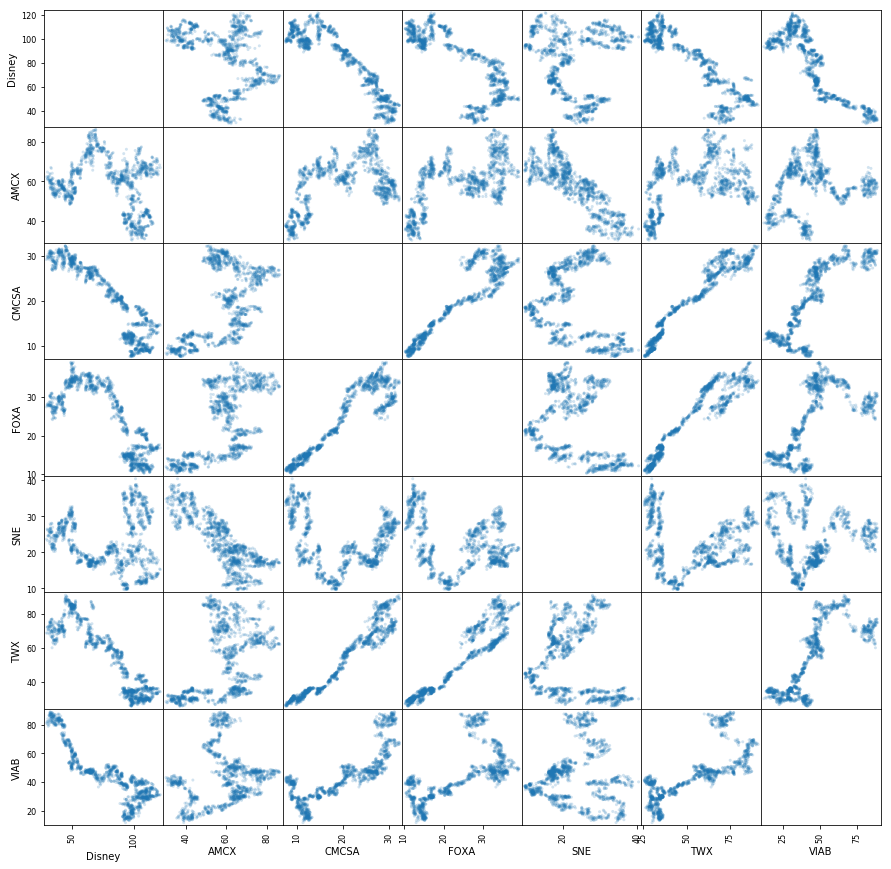

In [63]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(cdf, alpha=0.2, figsize=(15, 15), diagonal = 'orange')

In [64]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

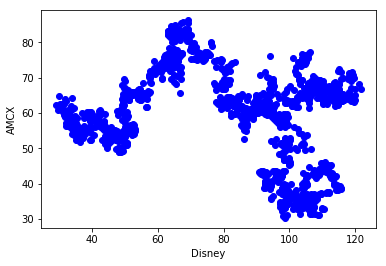

In [65]:
plt.scatter(train.Disney,train.AMCX, color = 'blue')
plt.xlabel("Disney")
plt.ylabel("AMCX")
plt.show()

In [68]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AMCX']])
train_y = np.asanyarray(train[['Disney']])
regr.fit(train_x,train_y)

# The coefficients

print ('Coefficients : ',regr.coef_)
print ('Intercept : ',regr.intercept_)
print ('R-Square :', regr.score(train_x, train_y))


Coefficients :  [[-0.50809009]]
Intercept :  [ 110.64238285]
R-Square : 0.0625469068813


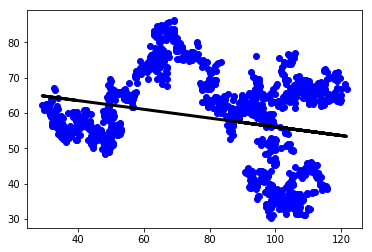

In [24]:
train_y_ = regr.predict(train_x)
plt.scatter(train.Disney,train.AMCX, color ='blue')
plt.plot(train_x, train_y_, color='black', linewidth =3)

In [25]:

test_x = np.asanyarray(test[['Disney']])
test_y = np.asanyarray(test[['AMCX']])
test_y_ = regr.predict(test_x)

print ("Residual Sum of Squares : %.2f"
      % np.mean((test_y_ - test_y)**2))

# Explained variance score : 1 is perfect prediction

print('Variance Score : %.2f' % regr.score(test_x,test_y))

Residual Sum of Squares : 148.14
Variance Score : 0.06


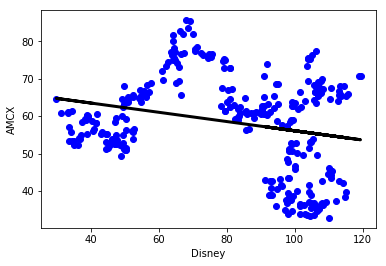

In [26]:

plt.scatter(test_x,test_y, color ='blue')
plt.plot(test_x, test_y_, color ='black', linewidth =3)
plt.xlabel("Disney")
plt.ylabel("AMCX")
plt.show()

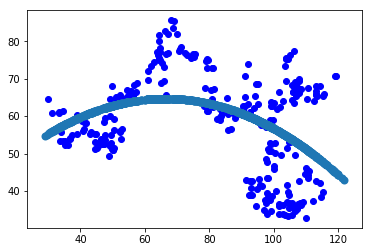

In [27]:

#Non-Linear Model 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2),Ridge())
model.fit(train_x,train_y)
train_y_ = model.predict(train_x)
plt.scatter(test_x,test_y, color = 'blue')
plt.scatter(train_x,train_y_,linewidth = 2)

C:\Users\rushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C693DE160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000017C6A4C32E8>]], dtype=object)

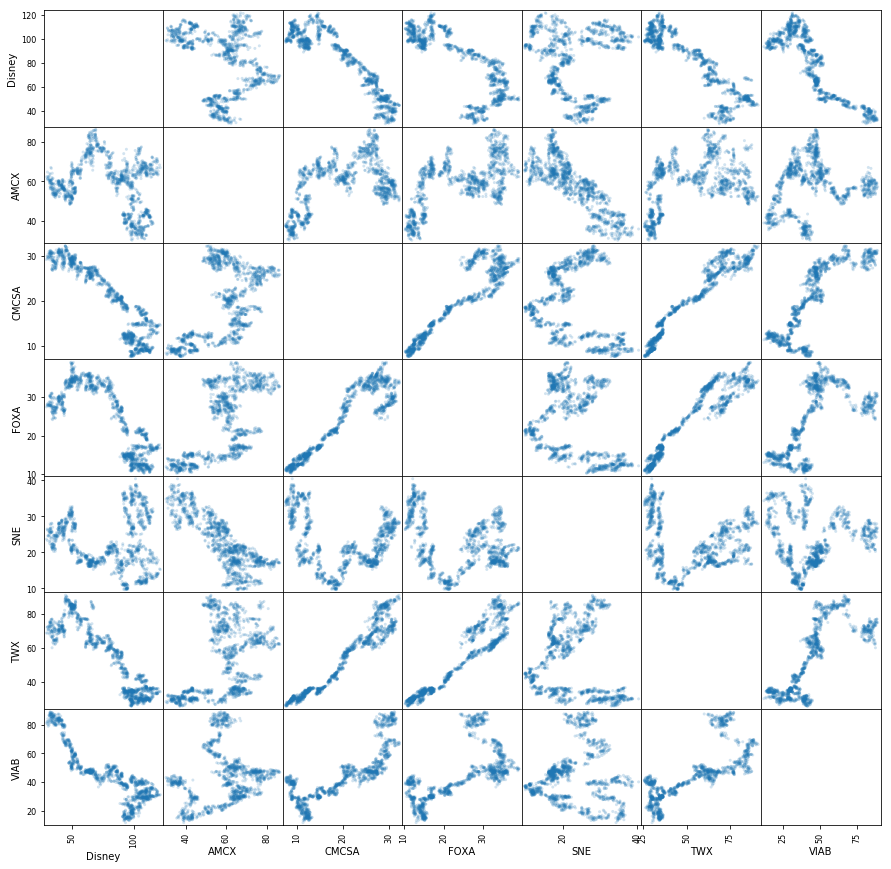

In [75]:


#Multiple Linear Regression Model
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['AMCX', 'CMCSA', 'FOXA', 'SNE', 'TWX', 'VIAB']])
y = np.asanyarray(train[['Disney']])
regr.fit (x, y)
predictions = model.predict(y)

#  The Coefficients

print ('Coefficients : ',regr.coef_)
print ('R-Square :', regr.score(x, y))



Coefficients :  [[ 0.04596394 -2.96906707  0.55152461 -0.70394315 -0.18283042 -0.21395056]]
R-Square : 0.924432608508


In [76]:
#Multiple Linear Regression Model
y_=regr.predict(test[['AMCX', 'CMCSA', 'FOXA', 'SNE', 'TWX', 'VIAB']])
x = np.asanyarray(test[['AMCX', 'CMCSA', 'FOXA', 'SNE', 'TWX', 'VIAB']])
y = np.asanyarray(test[['Disney']])
print("Residual Sum of Squares : %.2f"
     %np.mean((y_ -y)**2))

#Explained Variance Score : 1 is perfect prediction

print('Variance Score : %.2f' % regr.score(x,y))

Residual Sum of Squares : 47.05
Variance Score : 0.93


In [78]:
import statsmodels.api as sm
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     2306.
Date:                Sun, 10 Dec 2017   Prob (F-statistic):          3.82e-258
Time:                        19:45:34   Log-Likelihood:                -1263.9
No. Observations:                 323   AIC:                             2540.
Df Residuals:                     317   BIC:                             2563.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9833      0.060     33.193      0.000       1.866       2.101
x2            -4.6738      0.498     -9.380      0.000      -5.654      -3.693
x3            -0.4653      0.333     -1.396      0.164      -1.121       0.191
x4             1.9273      0.088     21.898      0.000       1.754       2.100
x5             0.3825      0.184      2.080      0.038       0.021       0.744
x6             0.0578      0.081      0.713      0.476      -0.102       0.217
==============================================================================
Omnibus:                       12.983   Durbin-Watson:                   0.186
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.639
Skew:                           0.502   Prob(JB):                      0.00109
Kurtosis:                       3.080   Cond. No.                         79.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
#Multiple Linear Regression Model
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['AMCX', 'CMCSA', 'FOXA', 'SNE', 'TWX']])
y = np.asanyarray(train[['Disney']])
regr.fit (x, y)


#  The Coefficients

print ('Intercept : ',regr.intercept_)
print ('Coefficients : ',regr.coef_)
print ('R-Square :', regr.score(x, y))


Intercept :  [ 151.64374581]
Coefficients :  [[ 0.15421849 -3.84166393  0.75698032 -0.68597382 -0.12218215]]
R-Square : 0.919862280558


In [82]:
import statsmodels.api as sm
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.167e+04
Date:                Sun, 10 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:47:51   Log-Likelihood:                -5285.9
No. Observations:                1335   AIC:                         1.058e+04
Df Residuals:                    1330   BIC:                         1.061e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0456      0.029     70.851      0.000       1.989       2.102
x2            -4.3559      0.196    -22.221      0.000      -4.740      -3.971
x3            -0.5495      0.175     -3.148      0.002      -0.892      -0.207
x4             1.9097      0.041     46.680      0.000       1.829       1.990
x5             0.3037      0.105      2.883      0.004       0.097       0.510
==============================================================================
Omnibus:                       31.056   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.824
Skew:                           0.252   Prob(JB):                     4.07e-06
Kurtosis:                       2.562   Cond. No.                         58.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""